In [7]:
#import required libraires
import numpy as np
import pandas as pd

#for box-cox transformations
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)



In [8]:
import sklearn

In [6]:
sklearn.__version__

'1.1.1'

In [2]:
#load dataset
nfl_data=pd.read_csv('/home/proton/datasets/NFL/NFL Play by Play 2009-2017 (v4).csv')

/tmp/ipykernel_2886/1078055549.py:2: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data=pd.read_csv('/home/proton/datasets/NFL/NFL Play by Play 2009-2017 (v4).csv')


In [3]:
nfl_data.shape

(407688, 102)

In [6]:
total_cells=np.product(nfl_data.shape)
total_cells

41584176

In [9]:
empty_cells=nfl_data.isna().sum()
empty_cells

Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64

In [10]:
total_empty_cells=nfl_data.isna().sum().sum()
total_empty_cells

10342875

In [12]:
percentage_of_empty_cells=(total_empty_cells/total_cells)*100
percentage_of_empty_cells

24.87214126835169

In [13]:
#drop the rows where at least one empty cells
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [ ]:
columns_with_na_dropped=nfl_data.dropna(axis='columns')
columns_with_na_dropped.head()


In [17]:
print('columns in original dataset:', nfl_data.shape)
print('coluns_with_na\'s_dropped:', columns_with_na_dropped .shape)

columns in original dataset: (407688, 102)
coluns_with_na's_dropped: (407688, 41)


In [19]:
nfl_data.head(2)
nfl_data['Date']

0         2009-09-10
1         2009-09-10
2         2009-09-10
3         2009-09-10
4         2009-09-10
             ...    
407683    2017-12-31
407684    2017-12-31
407685    2017-12-31
407686    2017-12-31
407687    2017-12-31
Name: Date, Length: 407688, dtype: object

In [25]:
#get the subset of the dataset
subset_of_nfl_data=nfl_data.loc[:, 'EPA':'Season'].head(10)
subset_of_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
5,-0.696302,NaN,NaN,0.558929,0.441071,0.578453,0.421547,0.441071,-0.019524,NaN,NaN,2009
6,-0.179149,-0.343085,0.163935,0.578453,0.421547,0.582881,0.417119,0.421547,-0.004427,-0.010456,0.006029,2009
7,-1.119477,NaN,NaN,0.582881,0.417119,0.617544,0.382456,0.417119,-0.034663,NaN,NaN,2009
8,-0.021313,NaN,NaN,0.617544,0.382456,0.591489,0.408511,0.382456,0.026054,NaN,NaN,2009
9,-0.215293,-0.756894,0.541602,0.591489,0.408511,0.585405,0.414595,0.591489,-0.006084,-0.024526,0.018442,2009


In [1]:
import numpy


In [1]:
import mlxtend
import seaborn
import matplotlib


In [2]:
numpy.__version__

'1.22.4'

In [2]:
mlxtend.__version__

'0.20.0'

In [3]:
seaborn.__version__


'0.11.2'

Scaling and Normalization


In [9]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data=np.random.exponential(size=1000)
original_data
df=pd.DataFrame(original_data)
df

,0
0,0.795875
1,1.255931
2,0.923223
3,0.787201
4,0.551048
...,...
995,0.102782
996,0.723446
997,2.787289
998,0.259609


In [10]:
scaled_data=minmax_scaling(original_data, columns=[0])
scaled_data

array([[9.29069355e-02],
       [1.46648782e-01],
       [1.07783271e-01],
       [9.18937503e-02],
       [6.43073845e-02],
       [1.21209631e-01],
       [6.71659502e-02],
       [2.59679024e-01],
       [3.87170377e-01],
       [5.64285794e-02],
       [1.83208088e-01],
       [8.78604457e-02],
       [9.79952384e-02],
       [3.03453385e-01],
       [8.54382012e-03],
       [1.05852553e-02],
       [2.32223683e-03],
       [2.08743037e-01],
       [1.75835619e-01],
       [2.38277183e-01],
       [4.49118933e-01],
       [1.87453574e-01],
       [7.22369551e-02],
       [1.77091593e-01],
       [1.46403274e-02],
       [1.19255605e-01],
       [1.80110794e-02],
       [3.38050292e-01],
       [8.61261010e-02],
       [6.24987517e-02],
       [3.58314105e-02],
       [1.73787909e-01],
       [7.10866648e-02],
       [9.81005899e-02],
       [2.15203443e-03],
       [1.12240703e-01],
       [1.10560395e-01],
       [1.12026585e-01],
       [3.36122204e-01],
       [1.33706547e-01],


<function matplotlib.pyplot.show(close=None, block=None)>

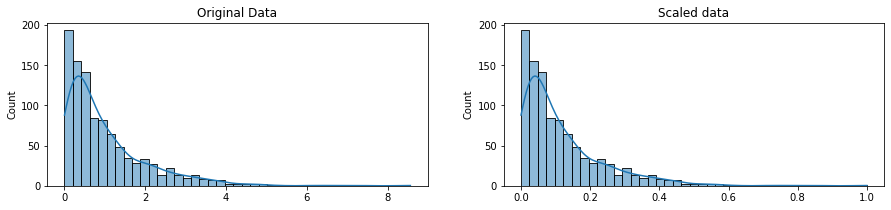

In [11]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show

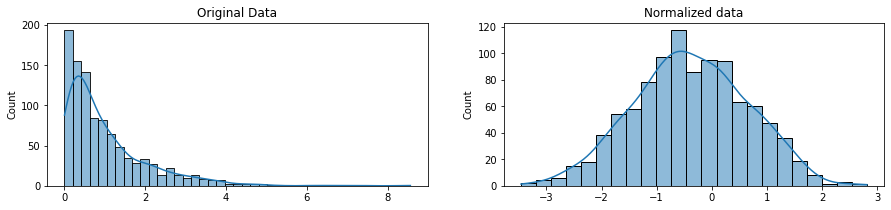

In [12]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()